<a href="https://colab.research.google.com/github/StevenGarc/Ejercicios_IA/blob/master/taller_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1 


Para cada uno de los siguientes problemas indicar si es un problema de clasificación o de regresión:

  a) Predecir la temperatura promedio de la próxima semana => **Regresión**

  b) Predecir si mañana va a llover o no => **Clasificación**

  c) Determinar si un correo es spam o no spam => **Clasificación**

  d) Determinar a que tema pertenece un documento => **Clasificación**

  e) Determinar qué objetos hay en una imagen => **Clasificación**

  f) Determinar el precio de las acciones de Google el dia de mañana => **Regresión**

# Punto 2

2) Dado el siguiente Dataset que contiene los precios de las casas según el área:

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'Área':[20.2,30.1,40.2,49.9,70.1,90], 'Precio':[100,200,300,400,600,800]})
df

,Área,Precio
0,20.2,100
1,30.1,200
2,40.2,300
3,49.9,400
4,70.1,600
5,90.0,800


Grafique los datos

Text(0, 0.5, 'Precio')

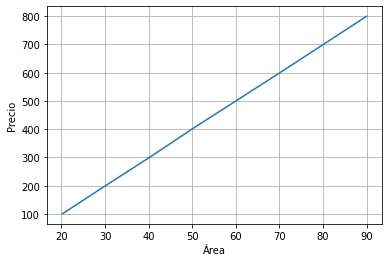

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Área'], df['Precio'])
plt.grid(True)
plt.xlabel('Área')
plt.ylabel('Precio')


Proponga dos modelos distintos para predecir el precio de una casa a partir del área.

Primero: Modelo lineal
segundo: Modelo exponencial

In [ ]:
class modelo_lineal:
  def __init__(self, df):
    punto1 = [df['Área'][0], df['Precio'][0]]
    punto2 = [df['Área'][len(df)-1], df['Precio'][len(df)-1]]
    self.m = (punto2[1] - punto1[1])/(punto2[0] - punto1[0])
    self.c = punto1[1] - (self.m * punto1[0])
  
  def evaluar(self, area):
    return area*self.m+self.c


In [ ]:
class modelo_exponencial:
  def __init__(self, df):
    punto1 = [df['Área'][0], df['Precio'][0]]
    punto2 = [df['Área'][len(df)-1], df['Precio'][len(df)-1]]
    self.b = (punto2[1] / punto1[1])**(1/(punto2[0] - punto1[0]))
    self.a = punto1[1]/(self.b**punto1[0])

  def evaluar(self, area):
    return self.a*(self.b**area)

Utilice el error cuadrático medio para determinar cuál es mejor.

basado en el ECM el mejor modelo es el lineal

In [ ]:
def error_cuadratico_medio(real, prediccion):
    ECM = 0
    n = len(real)
    for y in range(n):
      ECM +=  (prediccion[y]-real[y])**2
    ECM*=1/n
    return ECM


In [ ]:
m1 = modelo_lineal(df)
m2 = modelo_exponencial(df)

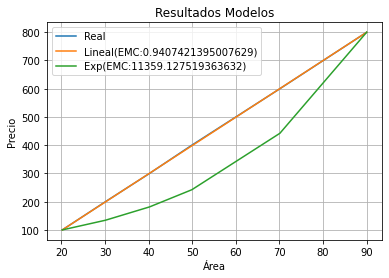

In [ ]:
resusltados_lineal = [m1.evaluar(m) for m in df['Área']]
resultados_exponencial = [m2.evaluar(m) for m in df['Área']]

ecm_linear = error_cuadratico_medio(df['Precio'],resusltados_lineal)
ecm_exp = error_cuadratico_medio(df['Precio'],resultados_exponencial)

p1 = plt.plot(df['Área'], df['Precio'])
p2 = plt.plot(df['Área'], resusltados_lineal)
p3 = plt.plot(df['Área'], resultados_exponencial)
plt.grid(True)
plt.legend(('Real', 'Lineal(EMC:{})'.format(ecm_linear), 'Exp(EMC:{})'.format(ecm_exp)))
plt.xlabel('Área')
plt.ylabel('Precio')
plt.title('Resultados Modelos')
plt.show()

# Punto 3

El siguiente dataset de entrenamiento contiene si un estudiante de IA aprobó o no la materia basado en
las notas de programación y de intro a la ing:

In [ ]:
programacion = [2.5,4,1,2,3.5,4,5,4,3.6,4.3]
intro = [3.3,2.7,3,2,3.5,3.5,5,3.6,3.8,4.1]
aprueva = [0,0,1,1,0,0,1,1,1,1]
df = pd.DataFrame({'Nota Programación':programacion, 'Nota Intro. Ing':intro, 'Aprueba IA':aprueva})
df

,Nota Programación,Nota Intro. Ing,Aprueba IA
0,2.5,3.3,0
1,4.0,2.7,0
2,1.0,3.0,1
3,2.0,2.0,1
4,3.5,3.5,0
5,4.0,3.5,0
6,5.0,5.0,1
7,4.0,3.6,1
8,3.6,3.8,1
9,4.3,4.1,1


¿Cuál podría ser la dimensión del vector de características?

1. Nota Programacióón
2. Nota Intro. Ing

grafique las dos notas usando una símbolo diferente para indicar cada clase

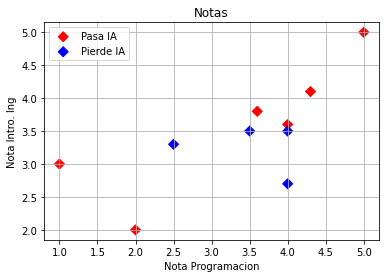

In [ ]:
pasan = df['Aprueba IA'] == 1
p = df[pasan]

pierden = df['Aprueba IA'] == 0
pi = df[pierden]

plt.scatter(p['Nota Programación'], p['Nota Intro. Ing'], s=50, c=['red' for j in p['Aprueba IA']], marker="D")
plt.scatter(pi['Nota Programación'], pi['Nota Intro. Ing'], s=50, c=['blue' for j in pi['Aprueba IA']], marker="D")
plt.xlabel('Nota Programacion')
plt.ylabel('Nota Intro. Ing')
plt.grid(True)
plt.legend(('Pasa IA','Pierde IA'))
plt.title('Notas')
plt.show()

dibuje la región de decisión.

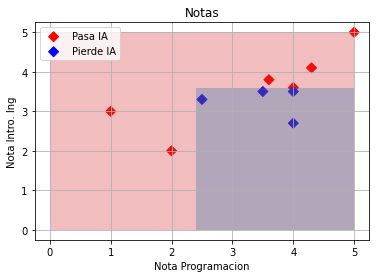

In [ ]:
plt.scatter(p['Nota Programación'], p['Nota Intro. Ing'], s=50, c=['red' for j in p['Aprueba IA']], marker="D")
plt.scatter(pi['Nota Programación'], pi['Nota Intro. Ing'], s=50, c=['blue' for j in pi['Aprueba IA']], marker="D")
plt.xlabel('Nota Programacion')
plt.ylabel('Nota Intro. Ing')
plt.grid(True)
plt.legend(('Pasa IA','Pierde IA'))
plt.title('Notas')

plt.broken_barh([(0,5)], (0, 5), facecolors='tab:red', alpha=0.3)
plt.broken_barh([(2.4,2.6)], (0, 3.6), facecolors='tab:blue', alpha=0.3)


plt.show()

In [ ]:
def modelo (programacion, intro):
  if programacion >=2.5 and intro <=3.5:
    return 0
  return 1  

In [ ]:
test_r= [0,1,0,1]
test = [[2.5, 2.5],
        [1.7, 1.5],
        [3.9, 4.5],
        [3.5, 4.5]]
test_p=[]
Accuracy=0
for i in range(len(test_r)):
  r = modelo(test[i][0], test[i][1])
  Accuracy+=1 if r == test_r[i] else 0
  test_p.append(r)
print(test_r)
print(test_p)
Accuracy/=len(test_r)
print('Accuracy', Accuracy)

[0, 1, 0, 1]
[0, 1, 1, 1]
Accuracy 0.75


# Punto 4

Utilice Sklearn para encontrar un modelo de regresión lineal del punto 2 usando :

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.DataFrame({'Área':[20.2,30.1,40.2,49.9,70.1,90], 'Precio':[100,200,300,400,600,800]})
df

,Área,Precio
0,20.2,100
1,30.1,200
2,40.2,300
3,49.9,400
4,70.1,600
5,90.0,800


In [ ]:
precios = df['Precio']
Area = df['Área']
Area

0    20.2
1    30.1
2    40.2
3    49.9
4    70.1
5    90.0
Name: Área, dtype: float64

In [ ]:
modelo = LinearRegression()
modelo.fit(Area, precios)

ValueError: ignored

In [ ]:
Area

[[20.2, 30.1, 40.2, 49.9, 70.1, 90.0]]